# Dimensionality Reduction 차원 축소
- 데이터에서 차원 = 변수의 수

#### Dimensionality Reduction 의 필요성
- 차원이 크면 시각화/이해하기/분석하기 어렵다

#### Dimensionality Reduction 방법
- 안 중요한 변수를 뺀다
- 축소 후에도 원래의 변수를 알 수 있어야 좋다

#### Dimensionality Reduction 예시
- 평균 점수
- 하나의 점수로 축소해서 이해/비교하기 쉽다
- 특정 변수에 가중치를 두기도 한다

## 선형모형을 이용한 차원 축소

> $X = WZ$ 

$X$: 관찰변수, $Z$: 잠재변수

#### cf. 선형모형
> $y = ax$  

$x, y$: 관찰변수

## PCA Principal Component Analysis
- 변수를 줄이고 싶을 때 쓴다
- 축을 회전시켜 새로운 축(Component)을 찾아낸다
- 분산이 큰 순서대로 Component 를 정한다
- 분산이 작은 Component 를 제거하여 차원을 축소한다
#### PCA 방법
- 크게 움직이는 방향 하나만 남기고 나머지는 지운다
- 데이터가 가장 크게 움직이는 방향으로 새로운 축을 만든다

In [1]:
import pandas as pd

In [2]:
from sklearn.decomposition import PCA

In [3]:
import seaborn as sns

In [5]:
wine = pd.read_csv('wine.csv')

wine.sample()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,Color intensity,Hue,OD,Proline
99,2,12.29,3.17,2.21,18.0,88,2.85,2.99,0.45,2.81,2.3,1.42,2.83,406


In [6]:
pca = PCA(n_components=2)

pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### 전체 Column 을 2개로 축소

In [7]:
score = pca.fit_transform(wine.iloc[:, 1:])

score

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

In [9]:
# 첫번째 차원이 99 % 설명하고, 
# 두번째 차원이 전체 데이터를 0.1 % 설명한다

pca.explained_variance_ratio_ # 설명된 분산의 비율, R-squared 와 같다

array([0.99809123, 0.00173592])

In [29]:
score_df = pd.DataFrame(score, columns=['Comp1', 'Comp2'])

### 원래 Class 정보를 가져와서 붙인다

In [30]:
score_df['Class'] = wine['Class'] 

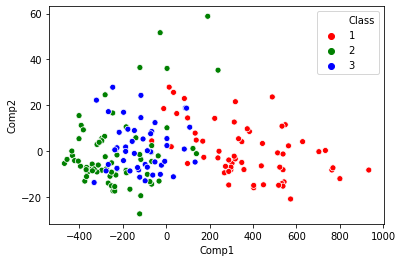

In [31]:
sns.scatterplot('Comp1', 'Comp2', hue='Class', data=score_df, palette=['r', 'g', 'b'])

### → 와인 종류는 Comp1 에 따라 결정된다 

## 몇 차원으로 줄일지 결정하는 방법

In [33]:
# 차원을 정하지 않는다

p = PCA()

In [34]:
p.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
# 이 값을 전체 분산으로 나누면 ratio
# 각 분산이 자기자신을 설명하는 비율 1
# 차원 축소를 해서 전체 변수의 분산을 확인
# 설명된 분산이 1 이상인 축만 남긴다

p.explained_variance_ 

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

## 표준화 후에 PCA
- 모든 변수가 골고루 반영된다
- 변수 간 경중이 없다. 실제로 더 중요한 변수가 있어도 반영 안된다

#### 표준화

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scale = StandardScaler()

In [21]:
x = scale.fit_transform(wine.iloc[:, 1:])

C:\Users\Minju\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Minju\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### PCA

In [22]:
sp = PCA(n_components=2)

In [23]:
# fit: 파라미터 추정(축 회전)
# transform: 변환 → 축소된 차원으로 점수를 변환해서 새로운 점수 부여

score2 = sp.fit_transform(x)

In [25]:
# 표준화하여 모든 변수가 고르게 움직이기 때문에 
# 설명할 수 있는 비율 줄어들었다
# 그래도 2 개 변수로 50 % 이상 설명

sp.explained_variance_ratio_ 

array([0.36198848, 0.1920749 ])

In [51]:
score_df = pd.DataFrame(score2, columns=['Comp1', 'Comp2'])

In [52]:
score_df['Class'] = wine['Class']

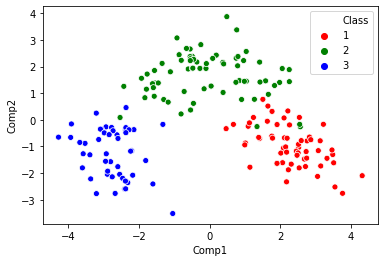

In [53]:
sns.scatterplot('Comp1', 'Comp2', hue='Class', data=score_df, palette=['r', 'g', 'b'])

### → 표준화해서 2 개의 축이 좀 더 고르게 설명

## HistPlot 으로 1차원으로 확인

In [55]:
import numpy as np

#### 표준화 안 한 것

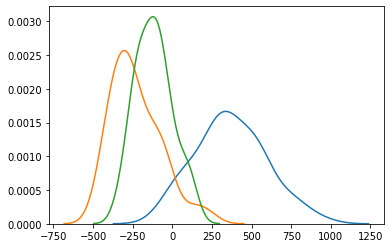

In [58]:
for c in range(1, 4):
    d = np.extract(wine['Class'] == c, score[:, 0])
    
    sns.distplot(d, hist=False)

#### 표준화한 것

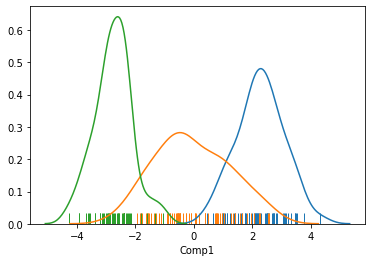

In [66]:
for c in range(1, 4):
    d = np.extract(wine['Class'] == c, score2[:, 0])
    
    sns.distplot(d, hist=False)

# 똑같은 것 다른 문법
for c in range(1, 4):
    d = score_df.query(f'Class == {c}')['Comp1']
    
    sns.distplot(d, rug=True, hist=False)

In [60]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([10, 11, 12, 13, 14])
np.extract(a > 3, b)

array([13, 14])

#### 위의 그래프 그리기 연습

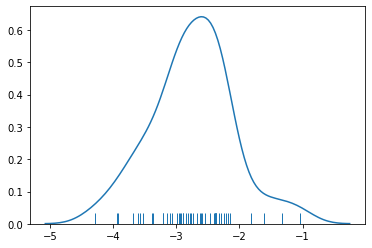

In [62]:
score_df.query('Class == 1')['Comp1']
sns.distplot(d, rug=True, hist=False)

# 실습) hsb 
read write math science socst 다섯 과목을 PCA 해서 2차원에 성별(female)에 따라 시각화 해보세요

In [70]:
hsb = pd.read_csv('hsb2.csv')

hsb.sample()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
65,140,0,4,2,1,3,44,41,40,50,26


#### PCA Componenet 갯수 찾기

In [91]:
p = PCA()

In [101]:
score = p.fit_transform(hsb.iloc[:, 6:])

In [102]:
p.explained_variance_

array([334.84364479,  59.23317622,  38.79998358,  33.51044507,
        29.63177044])

In [103]:
p.explained_variance_ratio_

array([0.67506211, 0.11941715, 0.07822277, 0.06755879, 0.05973918])

#### Component 2 개로 차원 축소

In [104]:
pca = PCA(n_components=2)

In [105]:
score = pca.fit_transform(hsb.iloc[:, 6:])

In [106]:
pca.explained_variance_ratio_

array([0.67506211, 0.11941715])

In [107]:
score_df = pd.DataFrame(hsb_, columns=['Comp1', 'Comp2'])

In [108]:
score_df['female'] = hsb['female']

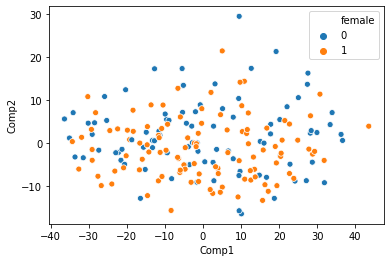

In [109]:
sns.scatterplot('Comp1', 'Comp2', hue='female', data=score_df)

## NMF Non-negative Matrix Factorization
$X = WH$

- 해석에 초점을 두고 싶을 때 쓴다
- PCA 에 비해 점수의 해석이 좀 더 쉽다(음수가 나오지 않기 때문에)
- 원 데이터를 보존하지 않는다
> cf. PCA 는 축을 회전시킬 뿐이라 원 데이터를 보존한다
- 의도를 반영할 방법이 없다

#### NMF 방법
- 하나의 데이터 $X$ 를 가중치 $W$ 와 점수 $H$ 의 곱으로 쪼갠다 Factorization
- 이때 $W$ 와 $H$ 는 모두 $>= 0$ Non-negative

#### 텍스트 분석에서 NMF 적용
- Term Document Matrix
- 리뷰 별로 한 행으로 치고
- 리뷰별로 어떤 단어를 얼마나 썼는지 Count

-| 화면| 가격| 터치| 디자인
-|-|-|-|-
1번 리뷰|3|2|1|4
2번 리뷰|1|2|0|0|7
3번 리뷰|1|1|0|0|0

> ex. Comp1 : 가격, 결제, 할인 많이 언급 → 가격에 민감
>
> ex. Comp2 : 화면, 터치, 사용감 많이 언급 → 기능에 민감
>
> 이런 식으로 카테고리로 나눠서 분석

In [111]:
from sklearn.decomposition import NMF

In [112]:
nmf = NMF(n_components=2)

In [113]:
score = nmf.fit_transform(hsb.iloc[:, 6:]) # score 값 모두 Non-negative

In [119]:
# 원 데이터를 재구성할 때 이만큼 에러가 생긴다
# 너무 크면 복원이 안된다. 에러 크기의 기준은 상대적

nmf.reconstruction_err_

143.12732842523727

In [117]:
# read = 17*Comp1 + 8*Comp2 
# write = 16*Comp1 + 11*Comp2
# ...
# science 에는 Comp2 에 영향을 받지 않는다
#
# Comp1 이 Comp2 보다 영향이 크다 등 해석 가능
# Comp1(지능), Comp2(문과성향) 에 이름을 잘 붙이는게 중요하다

nmf.components_

array([[17.10271518, 16.15759752, 18.78260808, 21.04648333, 10.11797503],
       [ 8.97102696, 11.34934325,  5.56484605,  0.        , 24.19692873]])

In [120]:
# score 이용해 원점수 구하기
# @ 행렬의 곱셈

score @ nmf.components_

array([[50.23369812, 51.73798321, 48.78281813, 45.37616621, 57.85010278],
       [60.73092935, 61.16326015, 61.04485817, 60.18330377, 60.82751741],
       [45.18953311, 42.730558  , 49.57115147, 55.46298272, 26.98558397],
       [52.39699097, 53.07373799, 52.21473462, 50.75779297, 54.476666  ],
       [53.64579155, 54.70935601, 52.9062224 , 50.54366152, 58.21136294],
       [54.04625658, 54.6160699 , 54.04955657, 52.84803169, 55.34857235],
       [52.40236007, 53.9844118 , 50.86971277, 47.28586091, 60.43186417],
       [40.17365298, 40.03081009, 41.02101992, 41.45859502, 37.41907682],
       [56.84926744, 56.5805025 , 58.14776034, 58.92350749, 52.51337877],
       [52.96365486, 53.33153134, 53.25109864, 52.52125623, 52.9876813 ],
       [53.81158765, 54.91840363, 53.01011633, 50.54636115, 58.65393401],
       [59.24775149, 59.87215917, 59.25173508, 57.93515003, 60.67379155],
       [66.89740748, 67.92084994, 66.42691334, 64.19225403, 70.60033924],
       [55.39068427, 54.84162186, 57.0

In [115]:
score_df = pd.DataFrame(score, columns=['Comp1', 'Comp2'])

In [121]:
score_df['female'] = hsb['female']

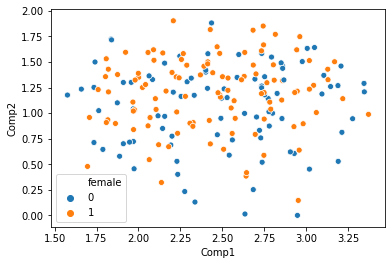

In [122]:
sns.scatterplot('Comp1', 'Comp2', hue='female', data=score_df)

## NMF 실습) med.csv

In [125]:
med = pd.read_csv('med.csv')

med.sample()

,Unnamed: 0,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
17,17,A,1,M,3.51,3.54,9,10,9.0,11,39,1


#### 결측치 처리 방법1

In [ ]:
med.dropna(implace=True) # 빈 값이 있는 행을 없애고 med 에 덮어쓴다

#### 결측치 처리 방법 2

In [127]:
med.isnull().sum()

Unnamed: 0    0
Accept        0
Acceptance    0
Sex           0
BCPM          0
GPA           0
VR            0
PS            0
WS            1
BS            0
MCAT          0
Apps          0
dtype: int64

In [131]:
WS_mean = np.mean(med['WS'])

In [132]:
med.loc[med['WS'].isnull(), 'WS'] = WS_mean

In [133]:
med.isnull().sum()

Unnamed: 0    0
Accept        0
Acceptance    0
Sex           0
BCPM          0
GPA           0
VR            0
PS            0
WS            0
BS            0
MCAT          0
Apps          0
dtype: int64

In [151]:
nmf = NMF(n_components=3)

In [152]:
med.iloc[:, 4:11].sample()

,BCPM,GPA,VR,PS,WS,BS,MCAT
34,3.22,3.24,11,12,8.0,10,41


In [153]:
score = nmf.fit_transform(med.iloc[:, 4:11])

In [154]:
nmf.reconstruction_err_

8.978041767766852

In [155]:
nmf.components_

array([[ 1.45600773,  1.43112029,  2.9518667 ,  4.53949009,  1.74509885,
         4.66498737, 14.13788117],
       [ 0.39626398,  0.51687627,  5.29501276,  0.6493332 ,  0.27680499,
         0.        ,  6.1119688 ],
       [ 0.43312751,  0.4621145 ,  0.        ,  0.        ,  6.72212617,
         0.4858724 ,  6.25847944]])

In [156]:
score_df = pd.DataFrame(score, columns=['Comp1', 'Comp2', 'Comp3'])

In [160]:
score_df['Sex'] = med['Sex'].replace({'M':0, 'F':1})

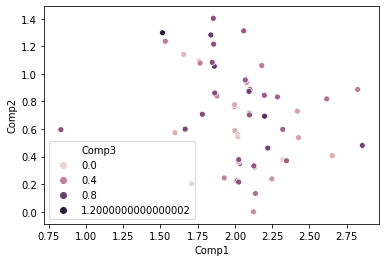

In [163]:
sns.scatterplot('Comp1', 'Comp2', 'Comp3', data=score_df)

### Imputation 
결측치 예측해서 채워넣는 방법

### Listwise Deletion 
행 단위로 통째로 지운다

## Factor Analysis 요인 분석
- 가설을 세워서 의도를 반영할 수 있다

탐색적 요인분석 | 확인적 요인분석
-|-
~= PCA | 어떤 잠재변수가 어떤 관찰변수에 영향을 줄지 우리가 정할 수 있다

#### Factor Analysis 해석
- Communality 
요인에 의해서 설명되는 부분 (%)

- Uniqueness
요인에 의해서 설명되지 않는 부분 (%)

In [174]:
test = pd.read_csv('test.csv')

In [175]:
!pip install factor_analyzer

^C


#### 요인 수 결정하기

In [196]:
from sklearn.preprocessing import StandardScaler

In [197]:
pc = PCA()

In [198]:
std = StandardScaler()
x = std.fit_transform(test)

C:\Users\Minju\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Minju\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [199]:
pc.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [200]:
from factor_analyzer import FactorAnalyzer

In [201]:
pc.explained_variance_

array([3.6397564 , 1.5731283 , 1.25920295, 0.71169667, 0.53641336,
       0.42424778, 0.36053782, 0.30005605, 0.25746066])

#### 회전

In [177]:
# method='ml' 써야 다른 툴(R 등)과 결과가 같게 나온다

fa = FactorAnalyzer(n_factors=3, method='ml', rotation=None)

In [209]:
fa.fit(test)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='ml', n_factors=3, rotation=None, rotation_kwargs={},
        use_smc=True)

In [189]:
# 계수 안본다
# 각 컬럼에 각 요인이 미치는 영향
# [요인1, 요인2, 요인3]

fa.loadings_

array([[ 0.51955858,  0.16175197,  0.45309734],
       [ 0.32602017,  0.08272213,  0.38326476],
       [ 0.48792281,  0.07938354,  0.46943598],
       [ 0.80764208, -0.31831809, -0.07341943],
       [ 0.79325452, -0.21423989, -0.15082861],
       [ 0.76449536, -0.30110154, -0.0575084 ],
       [ 0.41831056,  0.54127857, -0.37907994],
       [ 0.41926543,  0.70942401, -0.06367496],
       [ 0.57303763,  0.43495835,  0.16127781]])

In [185]:
# 이걸 본다
fa.get_communalities()

array([0.50140201, 0.26002398, 0.46474055, 0.75900255, 0.69790073,
       0.6784225 , 0.61166782, 0.68312044, 0.54357143])

In [184]:
fa.get_uniquenesses()

array([0.49859799, 0.73997602, 0.53525945, 0.24099745, 0.30209927,
       0.3215775 , 0.38833218, 0.31687956, 0.45642857])

In [210]:
fa.phi_ # 요인간 상관 행렬

## 확인적 요인분석

In [192]:
from factor_analyzer import ConfirmatoryFactorAnalyzer, ModelSpecificationParser

#### 모형

In [191]:
from sklearn.preprocessing import StandardScaler

In [202]:
std_test = pd.DataFrame(x, columns=test.columns)

In [203]:
model_dict = {
    'F1': ['Visual', 'Cubes', 'Lozenges'],
    'F2': ['Comprehension', 'Completion', 'Word'],
    'F3': ['Addition', 'Counting', 'Curve']
}

In [204]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(
    std_test,
    model_dict)

#### 분석

In [205]:
cfa = ConfirmatoryFactorAnalyzer(model_spec)

In [206]:
cfa.fit(std_test)

ConfirmatoryFactorAnalyzer(bounds=None, disp=True, impute='median',
              is_cov_matrix=False, max_iter=200, n_obs=145,
              specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x0000015A1F819BE0>,
              tol=None)

In [207]:
cfa.loadings_

array([[0.67664828, 0.        , 0.        ],
       [0.51650839, 0.        , 0.        ],
       [0.69358303, 0.        , 0.        ],
       [0.        , 0.86556615, 0.        ],
       [0.        , 0.82932926, 0.        ],
       [0.        , 0.82633548, 0.        ],
       [0.        , 0.        , 0.65912644],
       [0.        , 0.        , 0.79587121],
       [0.        , 0.        , 0.70084256]])

In [208]:
cfa.factor_varcovs_ # 요인간 상관

array([[1.        , 0.54066395, 0.52334521],
       [0.54066395, 1.        , 0.33613303],
       [0.52334521, 0.33613303, 1.        ]])

#### 적합도

In [211]:
cfa.aic_

3351.2051178389684

In [212]:
cfa.bic_

3503.0185387024176